In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

from sklearn.metrics import f1_score

df=pd.read_csv('creditcard.csv')

In [2]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


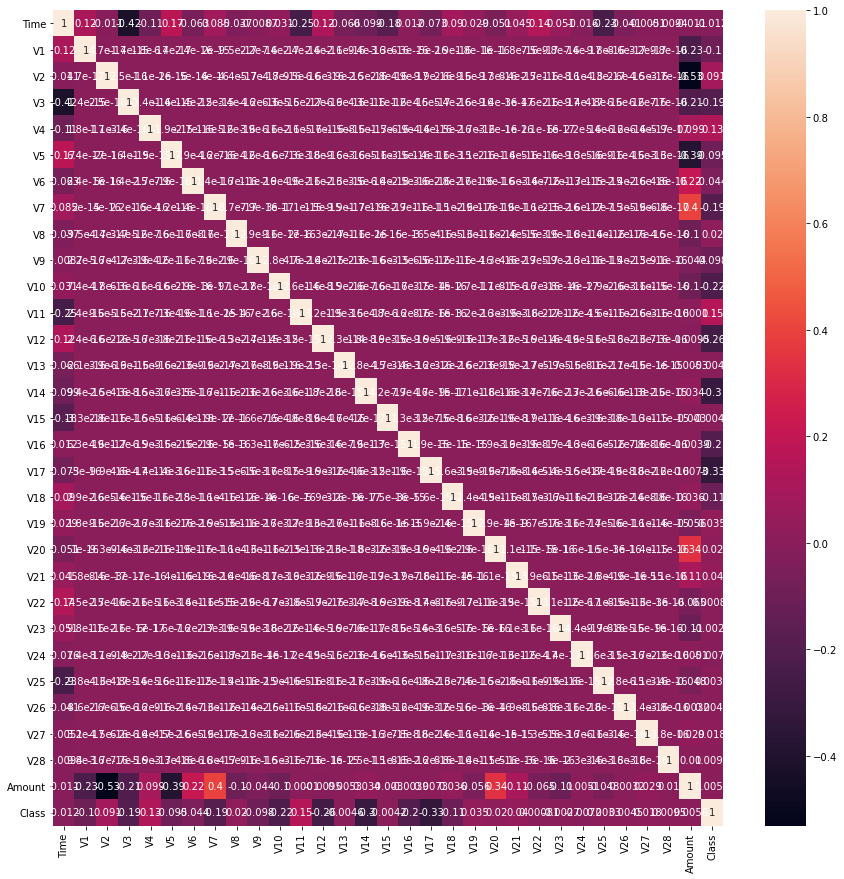

In [3]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [4]:
# V1 to V28 are the most important features according to the PCA done on  this data. Dropping others.
# df.drop(columns=['Amount','Time'], axis=1, inplace=True)

In [5]:
X=df.drop(columns=['Class','Amount','Time'])
Y= df['Class']

In [6]:
X.shape

(284807, 28)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y)
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [8]:
#building Isolation Forest model
#Isolation forest is an unsupervised algorithm that needs no labels to identify the anomalies in the data which in this case are the @fraud cases
# Isolation forest specially for Anomaly Detection
iso_forest = IsolationForest(n_estimators=100, max_samples=256,contamination=0.2, random_state=20)
iso_model = iso_forest.fit(x_train)
score_anomalies = iso_model.decision_function(x_train)
score_anomalies


array([-0.03123992, -0.00714514,  0.00955259, ..., -0.05306736,
        0.01945022, -0.03125246])

(array([1.0000e+00, 6.0000e+00, 1.0000e+01, 8.0000e+00, 4.0000e+00,
        4.0000e+00, 1.0000e+01, 2.2000e+01, 2.1000e+01, 1.0000e+01,
        2.4000e+01, 1.8000e+01, 1.5000e+01, 1.3000e+01, 2.0000e+01,
        1.7000e+01, 1.5000e+01, 2.1000e+01, 1.9000e+01, 1.8000e+01,
        2.5000e+01, 3.8000e+01, 3.8000e+01, 3.2000e+01, 4.1000e+01,
        4.2000e+01, 4.6000e+01, 5.6000e+01, 6.5000e+01, 8.9000e+01,
        7.4000e+01, 9.3000e+01, 9.9000e+01, 9.9000e+01, 8.2000e+01,
        9.6000e+01, 9.6000e+01, 1.2000e+02, 1.1700e+02, 1.3000e+02,
        1.3100e+02, 1.3200e+02, 1.3700e+02, 1.6900e+02, 1.2100e+02,
        1.5700e+02, 1.6200e+02, 1.9300e+02, 1.9800e+02, 1.9900e+02,
        2.3900e+02, 2.3900e+02, 2.3500e+02, 2.6300e+02, 2.7900e+02,
        3.2800e+02, 3.0200e+02, 3.7000e+02, 4.0300e+02, 3.9600e+02,
        4.6000e+02, 5.7100e+02, 5.7300e+02, 5.5200e+02, 7.1200e+02,
        7.7100e+02, 8.6600e+02, 9.8000e+02, 1.0890e+03, 1.2700e+03,
        1.3900e+03, 1.6680e+03, 1.9350e+03, 2.18

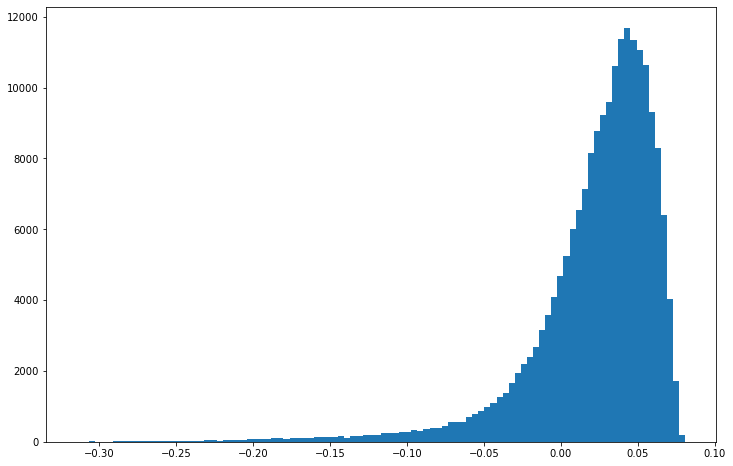

In [9]:
# plotting graph to identify anomalie score.
plt.figure(figsize=(12, 8))
plt.hist(score_anomalies, bins=100)

In [10]:
# threshold for the anomalies(-0.07) was tuned till the best metrics were got, then used on the test set to ensure model not overfitting.

from sklearn.metrics import average_precision_score
average_precision_score(y_train==1,(-0.07 > score_anomalies))

0.030703586547971135

In [11]:
# ROC_AUC on train set
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train==1,(-0.07 > score_anomalies))

0.884859269723973

In [12]:
# f1_score on training set (anomalies)
f1_score(y_train==1,(-0.07 > score_anomalies))

0.07205098192222656

In [13]:
# recall on training set(anomalies)
from sklearn.metrics import recall_score
recall_score(y_train==1,(-0.07 > score_anomalies))

0.8052325581395349

In [14]:
# predicting on test set
score_anomalies_test = iso_model.decision_function(x_test)

In [15]:
# precision on test set(anomalies) 
from sklearn.metrics import average_precision_score
average_precision_score(y_test==1,(-0.07 > score_anomalies_test))

0.03786788845830921

In [16]:
# ROC_AUC on test set(anomalies)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test==1,(-0.07 > score_anomalies_test))

0.937732995026799

In [17]:
# f1_score on test set(anomalies)
f1_score(y_test==1,(-0.07 > score_anomalies_test))

0.07910928801640786

In [18]:
# recall on test set(anomalies)
from sklearn.metrics import recall_score
recall_score(y_test==1,(-0.07 > score_anomalies_test))

0.9121621621621622

From the ROC_AUC score and RECALL on the training and test set, it can be seen that the model is Sensitive in detecting fraud cases and can therefore help in reducing transactional cost from fraud at the cost of Precision(false positives)